# Gathering Data

**First, we need to import all the libraries that we are going to use for this project.**

In [108]:
import pandas as pd
import requests
import tweepy
import json
import csv
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy

In [109]:
wrd_data = pd.read_csv('twitter-archive-enhanced.csv',encoding='utf-8')
#wrd_data=wrd_data.set_index('tweet_id')

In [110]:
wrd_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [111]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [112]:
with open(url.split('/')[-1],mode='wb') as image_file:
    image_file.write(response.content)
          

In [113]:
images_data = pd.read_csv('image-predictions.tsv',sep='\t',encoding='utf-8')
#images_data = images_data.set_index('tweet_id')

In [114]:
images_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,
                wait_on_rate_limit=True,
                 wait_on_rate_limit_notify=True)

In [ ]:
twit_ids = wrd_data.tweet_id
df_twitter = []
df_twitter_error = []

for tweet in twit_ids:
    try:
        tweet_info = api.get_status(tweet,tweet_mode='extended')
        df_twitter.append(tweet_info._json)
        
    except:
        print('The following ID has not been found: ' + str(tweet))
        df_twitter_error.append(tweet)
            

The following ID has not been found: 888202515573088257
The following ID has not been found: 879492040517615616


In [ ]:
with open('tweet_json.txt','w') as file:
    json.dump(df_twitter,file,
             sort_keys=True,
             indent=4)

In [115]:
twitter_data = pd.read_json('tweet_json.txt')

In [116]:
twitter_data = twitter_data[['id', 'retweet_count', 'favorite_count']]
twitter_data.head(5)

,id,retweet_count,favorite_count
0,892420643555336193,8730,39176
1,892177421306343426,6409,33556
2,891815181378084864,4257,25289
3,891689557279858688,8832,42545
4,891327558926688256,9613,40724



# Assessing Data

## CSV Data

In [117]:
wrd_data.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
781,775729183532220416,NaN,NaN,2016-09-13 16:13:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This girl straight up rejected a guy because he doesn't like dogs. She is my hero and I give her 13/10 https://t.co/J39lT3b0rH,NaN,NaN,NaN,https://twitter.com/dog_rates/status/775729183532220416/photo/1,13,10,None,None,None,None,None
239,846874817362120707,NaN,NaN,2017-03-29 00:01:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tuck. As you can see, he's rather h*ckin rare. Taken seriously until his legs are seen. Tail stuck in a permanent zoom. 13/10 https://t.co/P7PBGqrKSe",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/846874817362120707/photo/1,https://twitter.com/dog_rates/status/846874817362120707/photo/1",13,10,Tuck,None,None,None,None
1144,727286334147182592,NaN,NaN,2016-05-02 23:59:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I swear to god if we get sent another Blue Madagascan Peacock we'll deactivate. We 👏 Only 👏 Rate 👏 Dogs... 9/10 https://t.co/bbta2Q4URK,NaN,NaN,NaN,https://twitter.com/dog_rates/status/727286334147182592/photo/1,9,10,None,None,None,None,None
582,800388270626521089,NaN,NaN,2016-11-20 17:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Doc. He takes time out of every day to worship our plant overlords. 12/10 quite the floofer https://t.co/azMneS6Ly5,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/800388270626521089/photo/1,https://twitter.com/dog_rates/status/800388270626521089/photo/1,https://twitter.com/dog_rates/status/800388270626521089/photo/1",12,10,Doc,None,floofer,None,None
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2122,670403879788544000,NaN,NaN,2015-11-28 00:48:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Nigel. He accidentally popped his ball after dunking so hard the backboard shattered. 10/10 great great pup https://t.co/vSd1TWFK1I,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670403879788544000/photo/1,10,10,Nigel,None,None,None,None
2105,670474236058800128,NaN,NaN,2015-11-28 05:28:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Honor to rate this dog. Great teeth. Nice horns. Unbelievable posture. Fun to pet. Big enough to ride. 10/10 rad dog https://t.co/7JMAHdJ6A4,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670474236058800128/photo/1,10,10,None,None,None,None,None
224,849336543269576704,NaN,NaN,2017-04-04 19:03:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a dog because of the sign, but it is clearly Wilson from Home Improvement. Please only send in dogs... 11/10 https://t.co/jqPk1BZ6xu",NaN,NaN,NaN,https://twitter.com/dog_rates/status/849336543269576704/photo/1,11,10,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None
1371,702276748847800320,NaN,NaN,2016-02-23 23:39:59 +0000,"<a href=""http://twitter.co

In [118]:
wrd_data['text'][100]

'Here are my favorite #dogsatpollingstations \nMost voted for a more consistent walking schedule and to increase daily pats tenfold. All 13/10 https://t.co/17FVMl4VZ5'

In [119]:
wrd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [120]:
wrd_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [121]:
wrd_data['tweet_id'].value_counts().head()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
Name: tweet_id, dtype: int64

In [122]:
wrd_data['name'].value_counts().head(100)

None       745
a          55 
Charlie    12 
Cooper     11 
Lucy       11 
Oliver     11 
Lola       10 
Tucker     10 
Penny      10 
Bo         9  
Winston    9  
Sadie      8  
the        8  
Bailey     7  
Toby       7  
Buddy      7  
Daisy      7  
an         7  
Bella      6  
Oscar      6  
Rusty      6  
Scout      6  
Milo       6  
Stanley    6  
Jax        6  
Koda       6  
Jack       6  
Leo        6  
Dave       6  
Bentley    5  
          ..  
Walter     4  
Ruby       4  
Brody      4  
Scooter    4  
Duke       4  
Sampson    4  
Hank       4  
Archie     4  
Bruce      4  
one        4  
Reese      3  
Zeke       3  
Vincent    3  
Louie      3  
Malcolm    3  
Gizmo      3  
Max        3  
Earl       3  
Kyle       3  
Ted        3  
Frankie    3  
Lily       3  
Wallace    3  
Calvin     3  
Paisley    3  
Olive      3  
Klevin     3  
Ellie      3  
Rosie      3  
Peaches    3  
Name: name, Length: 100, dtype: int64

In [123]:
for word in wrd_data['name']:
    if word[0].islower():
        print(word)

such
a
quite
quite
quite
not
one
incredibly
a
mad
an
very
a
very
just
my
one
not
his
one
a
a
a
an
very
actually
a
just
getting
mad
very
this
unacceptable
all
a
old
a
infuriating
a
a
a
an
a
a
very
getting
just
a
the
the
actually
by
a
officially
a
the
the
a
a
a
a
life
a
one
a
a
a
light
just
space
a
the
a
a
a
a
a
a
a
a
a
an
a
the
a
a
a
a
a
a
a
a
a
a
a
quite
a
an
a
an
the
the
a
a
an
a
a
a
a


*It seems like all words which start with a lowercase are not dog names*

In [124]:
wrd_data['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [125]:
wrd_data['rating_denominator'].value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [126]:
ratings_wrong = wrd_data[wrd_data.rating_denominator!=10]
pd.set_option('display.max_colwidth', -1)
ratings_wrong[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


In [127]:
ratings_wrong.count()

tweet_id                      23
in_reply_to_status_id         5 
in_reply_to_user_id           5 
timestamp                     23
source                        23
text                          23
retweeted_status_id           1 
retweeted_status_user_id      1 
retweeted_status_timestamp    1 
expanded_urls                 19
rating_numerator              23
rating_denominator            23
name                          23
doggo                         23
floofer                       23
pupper                        23
puppo                         23
dtype: int64

## Image Data

In [128]:
images_data.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
200,669680153564442624,https://pbs.twimg.com/media/CUsuijgXAAE4pdi.jpg,1,dalmatian,0.141257,True,borzoi,0.137744,True,Labrador_retriever,0.103792,True
258,670780561024270336,https://pbs.twimg.com/media/CU8XW2dWwAA-Lmc.jpg,1,Labrador_retriever,0.244889,True,American_black_bear,0.056994,False,brown_bear,0.053993,False
338,672239279297454080,https://pbs.twimg.com/media/CVRGDrsWsAAUWSF.jpg,1,pug,0.332536,True,French_bulldog,0.258124,True,bull_mastiff,0.120873,True
497,675798442703122432,https://pbs.twimg.com/media/CWDrGH4UYAARoq_.jpg,1,beagle,0.681218,True,basset,0.125121,True,boxer,0.080398,True
833,693942351086120961,https://pbs.twimg.com/media/CaFg41YWkAAdOjy.jpg,1,groenendael,0.550796,True,Norwegian_elkhound,0.154770,True,schipperke,0.080802,True
1869,844580511645339650,https://pbs.twimg.com/media/C7iNfq1W0AAcbsR.jpg,1,washer,0.903064,False,dishwasher,0.032489,False,printer,0.016456,False
1941,861005113778896900,https://pbs.twimg.com/media/C_LnlF5VoAEsL1K.jpg,1,German_shepherd,0.507951,True,Pembroke,0.136113,True,muzzle,0.075764,False
1919,855851453814013952,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,1,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.096100,True
14,666094000022159362,https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg,1,bloodhound,0.195217,True,German_shepherd,0.078260,True,malinois,0.075628,True
599,679729593985699840,https://pbs.twimg.com/media/CW7iddWUsAElUC0.jpg,1,wallaby,0.164215,False,West_Highland_white_terrier,0.093515,True,ashcan,0.067278,False


In [129]:
images_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [130]:
images_data.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [131]:
images_data['tweet_id'].value_counts().head()

685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
Name: tweet_id, dtype: int64

In [132]:
images_data['jpg_url'].value_counts()

https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg                                            2
https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg                                            2
https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg                                            2
https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg                                            2
https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg                                            2
https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg                                            2
https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg                                            2
https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg                                            2
https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg                                            2
https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg                       

In [133]:
images_data['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
cocker_spaniel               30 
malamute                     30 
French_bulldog               26 
Chesapeake_Bay_retriever     23 
miniature_pinscher           23 
seat_belt                    22 
Siberian_husky               20 
German_shepherd              20 
Staffordshire_bullterrier    20 
web_site                     19 
Cardigan                     19 
beagle                       18 
Shetland_sheepdog            18 
teddy                        18 
Eskimo_dog                   18 
Maltese_dog                  18 
Lakeland_terrier             17 
Rottweiler                   17 
Shih-Tzu                     17 
kuvasz                       16 
Italian_greyhound            16 
          

## Twitter API Data

In [134]:
twitter_data.sample(10)

,id,retweet_count,favorite_count
2175,668988183816871936,512,950
1953,673355879178194945,645,1575
1863,675146535592706048,341,1275
1510,690735892932222976,1430,4082
1441,695816827381944320,1303,3250
2069,670832455012716544,237,774
1492,692142790915014657,434,1769
1449,695074328191332352,1226,3073
1410,698342080612007937,1059,2455
1803,676811746707918848,465,1511


In [135]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2347 entries, 0 to 2346
Data columns (total 3 columns):
id                2347 non-null int64
retweet_count     2347 non-null int64
favorite_count    2347 non-null int64
dtypes: int64(3)
memory usage: 73.3 KB


In [136]:
twitter_data.describe()

,id,retweet_count,favorite_count
count,2.347000e+03,2347.000000,2347.000000
mean,7.424023e+17,3076.767363,8115.288879
std,6.838829e+16,5103.141628,12188.576206
min,6.660209e+17,0.000000,0.000000
25%,6.783846e+17,614.000000,1411.000000
50%,7.189719e+17,1436.000000,3574.000000
75%,7.988157e+17,3584.500000,10066.500000
max,8.924206e+17,78436.000000,142960.000000


In [137]:
twitter_data['id'].value_counts().head()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
Name: id, dtype: int64

## Data Issues

## Quality Issues

### CSV Data

* QI1: We only want original ratings (no retweets) that have images. Hence, all the retweets need to be removed.
* QI2: The entries in a couple of columns are of incorrect type (e.g. 'timestamp' should have a type datetime and not object)
* QI3: Invalid names in the 'name' column (e.g. 'None','a','the','an')
* QI4: Invalid values for the ratings denominators (i.e. different than 10)
* QI5: Entries in the 'text' columns contain url-s



### Image Data

* QI6: Most of the column names are not descriptive enough (i.e. 'p1','p2','p3')
* QI7: There are a number of ID pairs which have the same image urls
* QI8: Some dog breeds are capitalized and others are not (inconsistency)



### Twitter API Data

* QI9: We can change the name of the 'id' column to 'tweet_id' in order to match the column name from the other two tables

## Tidiness Issues

* TI1: In the 'wrd_data' we do not need separate columns for each dog type (i.e. 'doggo','floofer','pupper','puppo'). We can merge them into one column
* TI2: In the 'wrd_data' we can split the 'timestamp' column into two - 'date' and 'time' in order to make the analysis and readibility easier
* TI3: Data is scattered around 3 different files, while we need only 1

# Cleaning Data

In [138]:
wrd_data_clean = wrd_data.copy()
images_data_clean = images_data.copy()
twitter_data_clean = twitter_data.copy()

In [139]:
wrd_data.count()

tweet_id                      2356
in_reply_to_status_id         78  
in_reply_to_user_id           78  
timestamp                     2356
source                        2356
text                          2356
retweeted_status_id           181 
retweeted_status_user_id      181 
retweeted_status_timestamp    181 
expanded_urls                 2297
rating_numerator              2356
rating_denominator            2356
name                          2356
doggo                         2356
floofer                       2356
pupper                        2356
puppo                         2356
dtype: int64

## Issue 1 (QI1): We only want original ratings (no retweets) that have images.

### ***Define***

* Remove all the entries for the 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' columns which are not equal to 0.
* Remove the 3 columns above, as well as the 'in_reply_to_status_id' and 'in_reply_to_user_id' ones which relate to the retweeted data (that we do not need)

### ***Code***

In [140]:
wrd_data_clean = wrd_data_clean[wrd_data_clean.retweeted_status_id.isnull()]
wrd_data_clean = wrd_data_clean[wrd_data_clean.retweeted_status_user_id.isnull()]
wrd_data_clean = wrd_data_clean[wrd_data_clean.retweeted_status_timestamp.isnull()]

In [141]:
wrd_data_clean = wrd_data_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1)

### ***Test***

In [142]:
wrd_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


## Issue 2 (QI2): The entries in a couple of columns are of incorrect type (e.g. 'timestamp' should have a type datetime and not object)

### ***Define***

* Change the type of the entries in the 'timestamp' column from object to datetime

### ***Code***

In [143]:
wrd_data_clean['timestamp'] = pd.to_datetime(wrd_data_clean['timestamp'])

### ***Test***

In [144]:
wrd_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 220.9+ KB


## Issue 3 (QI3): Invalid names in the 'name' column (e.g. 'None','a','the','an')

### ***Define***

* Replace all names starting with a lowercase letter as well as those entries which say 'None' with 'NaN' (I chose to use 'NaN' since that is how the missing entries have been described in most of the other columns)

### ***Code***

In [145]:
wrd_data_clean['name'].replace('None','NaN',inplace=True)

for word in wrd_data_clean['name']:
    if word[0].islower():
        wrd_data_clean['name'].replace(word,'NaN',inplace=True)

### ***Test***

In [146]:
wrd_data_clean['name'].value_counts()

NaN          784
Charlie      11 
Lucy         11 
Cooper       10 
Oliver       10 
Tucker       9  
Penny        9  
Sadie        8  
Winston      8  
Lola         8  
Daisy        7  
Toby         7  
Stanley      6  
Jax          6  
Bailey       6  
Koda         6  
Bella        6  
Oscar        6  
Bo           6  
Buddy        5  
Rusty        5  
Bentley      5  
Louis        5  
Scout        5  
Dave         5  
Chester      5  
Milo         5  
Leo          5  
Jack         4  
Maggie       4  
            ..  
Norman       1  
Charl        1  
Tonks        1  
Toffee       1  
Stu          1  
Goose        1  
Bronte       1  
Dobby        1  
Brat         1  
Murphy       1  
Jareld       1  
Kollin       1  
Brian        1  
Chuq         1  
Vince        1  
Tedrick      1  
Cali         1  
Grizzwald    1  
Stewie       1  
Jarvis       1  
Juckson      1  
Clarq        1  
Jomathan     1  
Genevieve    1  
Flurpson     1  
Al           1  
Ozzie        1  
Bruiser      1

## Issue 4 (QI4): Invalid values for the ratings denominators (i.e. different than 10)

### ***Define***

* Check the 'text' entries for all the entries of the 'rating_denominator' column which are greater than 10 in order to see if assigned rating is correct
* Change manually the rating where appropriate
* Assign a value of 'None' to all the ratings whose denominators are grater than 0 and are lacking any justification in the 'text' column

### ***Code***

In [147]:
ratings_wrong_clean = wrd_data_clean[wrd_data_clean.rating_denominator!=10]
pd.set_option('display.max_colwidth', -1)
ratings_wrong_clean[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90


In [148]:
wrd_data_clean.loc[(wrd_data_clean['tweet_id'] == 810984652412424192),'rating_numerator']= None
wrd_data_clean.loc[(wrd_data_clean['tweet_id'] == 810984652412424192),'rating_denominator']= None

wrd_data_clean.loc[(wrd_data_clean['tweet_id'] == 832088576586297345),'rating_numerator']= None
wrd_data_clean.loc[(wrd_data_clean['tweet_id'] == 832088576586297345),'rating_denominator']= None

wrd_data_clean.loc[(wrd_data_clean['tweet_id'] == 666287406224695296),'rating_numerator']= 9
wrd_data_clean.loc[(wrd_data_clean['tweet_id'] == 666287406224695296),'rating_denominator']= 10

wrd_data_clean.loc[(wrd_data_clean['tweet_id'] == 835246439529840640),'rating_numerator']= 13
wrd_data_clean.loc[(wrd_data_clean['tweet_id'] == 835246439529840640),'rating_denominator']= 10

wrd_data_clean.loc[(wrd_data_clean['tweet_id'] == 740373189193256964),'rating_numerator']= 14
wrd_data_clean.loc[(wrd_data_clean['tweet_id'] == 740373189193256964),'rating_denominator']= 10

wrd_data_clean.loc[(wrd_data_clean['tweet_id'] == 722974582966214656),'rating_numerator']= 13
wrd_data_clean.loc[(wrd_data_clean['tweet_id'] == 722974582966214656),'rating_denominator']= 10

wrd_data_clean.loc[(wrd_data_clean['tweet_id'] == 716439118184652801),'rating_numerator']= 11
wrd_data_clean.loc[(wrd_data_clean['tweet_id'] == 716439118184652801),'rating_denominator']= 10

wrd_data_clean.loc[(wrd_data_clean['tweet_id'] == 682962037429899265),'rating_numerator']= 10
wrd_data_clean.loc[(wrd_data_clean['tweet_id'] == 682962037429899265),'rating_denominator']= 10

In [149]:
ratings_wrong_clean = wrd_data_clean[wrd_data_clean.rating_denominator>10]
ratings_wrong_id_clean = ratings_wrong_clean['tweet_id']

In [150]:
for id in wrd_data_clean['tweet_id']:
    if str(id) in str(ratings_wrong_id_clean):
        wrd_data_clean.loc[(wrd_data_clean['tweet_id'] == id),'rating_numerator']= None
        wrd_data_clean.loc[(wrd_data_clean['tweet_id'] == id),'rating_denominator']= None
        

### ***Test***

In [151]:
# Check to make sure that there are no rating denominators which are different than 10
wrd_data_clean['rating_denominator'].value_counts()

10.0    2159
Name: rating_denominator, dtype: int64

## Issue 5 (QI5): Entries in the 'text' columns contain url-s

### ***Define***

* Remove the url-s from the 'text' column

### ***Code***

In [152]:
for text in wrd_data_clean.text:
    wrd_data_clean.loc[(wrd_data_clean['text'] == text),'text']= text.partition('https')[0]

### ***Test***

In [153]:
wrd_data_clean.text.sample(15)

1940    The millennials have spoken and we've decided to immediately demote to a 1/10. Thank you                                                      
680     This is Lucy. She destroyed not one, but two remotes trying to turn off the debate. 11/10 relatable af                                        
197     This is Arya. She can barely contain her excitement for more peanut butter. Also patriotic af. 13/10                                          
1939    When you're having a great time sleeping and your mom comes in and turns on the lights. 10/10                                                 
100     Here are my favorite #dogsatpollingstations \nMost voted for a more consistent walking schedule and to increase daily pats tenfold. All 13/10 
2353    Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af                                    
559     This is Winston. His selfie game is legendary. Will steal your girl with a single snap

## Issue 6 (QI6): Most of the column names are not descriptive enough (i.e. 'p1','p2','p3')

### ***Define***

* Rename the column names which are not descriptive enough so that they become easier to understand

### ***Code***

In [154]:
list(images_data)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [155]:
images_data_clean = images_data_clean.rename(index=str,columns={'jpg_url':'image_url','img_num':'image_number',
                                                                'p1':'first_prediction','p1_conf':'confidence_first_prediction','p1_dog':'first_prediction_is_breed',
                                                                'p2':'second_prediction','p2_conf':'confidence_second_prediction','p2_dog':'second_prediction_is_breed',
                                                                'p3':'third_prediction','p3_conf':'confidence_third_prediction','p3_dog':'third_prediction_is_breed'})

### ***Test***

In [156]:
list(images_data_clean)

['tweet_id',
 'image_url',
 'image_number',
 'first_prediction',
 'confidence_first_prediction',
 'first_prediction_is_breed',
 'second_prediction',
 'confidence_second_prediction',
 'second_prediction_is_breed',
 'third_prediction',
 'confidence_third_prediction',
 'third_prediction_is_breed']

## Issue 7 (QI8): Some dog breeds are capitalized and others are not (inconsistency)

### ***Define***

* Make all entries in the 'first_prediction', 'second_prediction' and 'third_prediction' columns to start with a capital letter

### ***Code***

In [157]:
for word in images_data_clean.first_prediction:
    if word[0].islower():
        images_data_clean['first_prediction'].replace(word,word.capitalize(),inplace=True)
        
for word in images_data_clean.second_prediction:
    if word[0].islower():
        images_data_clean['second_prediction'].replace(word,word.capitalize(),inplace=True)
        
for word in images_data_clean.third_prediction:
    if word[0].islower():
        images_data_clean['third_prediction'].replace(word,word.capitalize(),inplace=True)

### ***Test***

In [158]:
images_data_clean[['first_prediction','second_prediction','third_prediction']].sample(15)

,first_prediction,second_prediction,third_prediction
531,Great_Pyrenees,Kuvasz,Standard_poodle
319,Chihuahua,French_bulldog,Italian_greyhound
2043,Blenheim_spaniel,Shih-Tzu,Bernese_mountain_dog
1970,Laptop,French_bulldog,Printer
964,Samoyed,Kuvasz,Great_Pyrenees
575,Labrador_retriever,Flat-coated_retriever,Chest
294,Miniature_poodle,Toy_poodle,Irish_terrier
398,Samoyed,Arctic_fox,Chow
350,Doberman,Rottweiler,Appenzeller
1083,Badger,Boston_bull,Kelpie


## Issue 8 (QI9): We can change the name of the 'id' column to 'tweet_id' in order to match the column name from the other two tables

### ***Define***

* Change the name of the 'id' column to 'tweet_id' (twitter_data) in order to match the column name from the other two table

### ***Code***

In [159]:
twitter_data_clean = twitter_data_clean.rename(index=str,columns={'id':'tweet_id'})

### ***Test***

In [160]:
list(twitter_data_clean)

['tweet_id', 'retweet_count', 'favorite_count']

## Issue 9 (TI1): In the 'wrd_data' we do not need separate columns for each dog type (i.e. 'doggo','floofer','pupper','puppo'). We can merge them into one column

### ***Define***

* Merge the 4 columns (i.e. 'doggo','floofer','pupper','puppo') into one 'dog_stage'
* Remove the 4 previous columns

### ***Code***

In [161]:
# merge the content of the 4 columns into 1
wrd_data_clean['dog_stage'] = wrd_data_clean[['puppo','pupper','floofer','doggo']].apply(lambda x: ''.join(x.dropna().astype(str).values),axis=1)

# extract only the dog stage information from the cells (if available)
wrd_data_clean['dog_stage'] = wrd_data_clean['dog_stage'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)
wrd_data_clean = wrd_data_clean.drop(['puppo', 'pupper', 'floofer', 'doggo'], axis = 1)

### ***Test***

In [162]:
wrd_data_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
2145,669926384437997569,2015-11-26 17:11:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've never seen a dog so genuinely happy about a tennis ball. 12/10 s'cute,https://twitter.com/dog_rates/status/669926384437997569/photo/1,12.0,10.0,NaN,NaN
989,748932637671223296,2016-07-01 17:33:49,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Divine Doggo. Must be magical af. 13/10 would be an honor to pet,https://twitter.com/dog_rates/status/748932637671223296/photo/1,13.0,10.0,Divine,doggo
2354,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10.0,NaN,NaN
1295,707983188426153984,2016-03-10 17:35:20,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@serial @MrRoles OH MY GOD I listened to all of season 1 during a single road trip. I love you guys! I can confirm Bernie's 12/10 rating :),NaN,12.0,10.0,NaN,NaN
1988,672834301050937345,2015-12-04 17:46:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Ed. He's not mad, just disappointed. 10/10",https://twitter.com/dog_rates/status/672834301050937345/photo/1,10.0,10.0,Ed,NaN
518,810657578271330305,2016-12-19 01:26:42,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pavlov. His floatation device has failed him. He's quite pupset about it. 11/10 would rescue,https://twitter.com/dog_rates/status/810657578271330305/photo/1,11.0,10.0,Pavlov,NaN
442,819588359383371776,2017-01-12 16:54:26,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jazzy. She just found out that sandwich wasn't for her. Shocked and puppalled. 13/10 deep breaths Jazzy,https://twitter.com/dog_rates/status/819588359383371776/photo/1,13.0,10.0,Jazzy,NaN
563,802572683846291456,2016-11-26 18:00:13,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Winnie. She's h*ckin ferocious. Dandelion doesn't even see her coming. 12/10 would pet with caution,https://twitter.com/dog_rates/status/802572683846291456/photo/1,12.0,10.0,Winnie,NaN
657,791774931465953280,2016-10-27 22:53:48,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Vine will be deeply missed. This was by far my favorite one. 14/10,https://vine.co/v/ea0OwvPTx9l,14.0,10.0,NaN,NaN
401,824663926340194305,2017-01-26 17:02:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Wilson. Named after the volleyball. He tongue wrestled a bee and lost. 13/10 valiant effort tho,https://twitter.com/dog_rates/status/824663926340194305/photo/1,13.0,10.0,Wilson,NaN


In [163]:
wrd_data_clean.dog_stage.value_counts()

pupper     234
doggo      75 
puppo      25 
floofer    10 
Name: dog_stage, dtype: int64

## Issue 10 (TI2): In the 'wrd_data' we can split the 'timestamp' column into two - 'date' and 'time' in order to make the analysis and readibility easier

### ***Define***

* Create two new columns - 'date' and 'time' out of the 'timestamp' column
* Convert the two new columns to a 'datetime' format
* Delete the old 'timestamp' column

### ***Code***

In [164]:
wrd_clean = wrd_data_clean.copy()

In [165]:
wrd_clean.sample(4)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
645,793165685325201412,2016-10-31 19:00:10,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Benji. He's Air Bud. It's a low effort costume but he pulls it off rather h*ckin well. 12/10 would happily get dunked on,https://twitter.com/dog_rates/status/793165685325201412/photo/1,12.0,10.0,Benji,NaN
339,832273440279240704,2017-02-16 17:00:25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Smiley. He's a blind therapy doggo having a h*ckin blast high steppin around in the snow. 14/10 would follow anywhere,https://twitter.com/dog_rates/status/832273440279240704/video/1,14.0,10.0,Smiley,doggo
683,788412144018661376,2016-10-18 16:11:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Dexter. He breaks hearts for a living. 11/10 h*ckin handsome af,"https://twitter.com/dog_rates/status/788412144018661376/photo/1,https://twitter.com/dog_rates/status/788412144018661376/photo/1",11.0,10.0,Dexter,NaN
1959,673576835670777856,2015-12-06 18:56:46,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Sun burnt dog here. Quite large. Wants to promote peace. Looks unemployed. Ears for days. 7/10 would pet profusely,https://twitter.com/dog_rates/status/673576835670777856/photo/1,7.0,10.0,NaN,NaN


In [166]:
for id in wrd_data_clean.tweet_id:
    wrd_data_clean.loc[(wrd_data_clean['tweet_id']==id),'date'] = str(wrd_data_clean[wrd_data_clean.tweet_id == id].timestamp).split('   ')[1][:10]
    wrd_data_clean.loc[(wrd_data_clean['tweet_id']==id),'time'] = str(wrd_data_clean[wrd_data_clean.tweet_id == id].timestamp).split('   ')[1][11:19]


In [167]:
wrd_data_clean['date'] = pd.to_datetime(wrd_data_clean['date'])
# wrd_data_clean['time'] = pd.to_datetime.(wrd_data_clean['time'])

In [168]:
wrd_data_clean = wrd_data_clean.drop(['timestamp'], axis = 1)

### ***Test***

In [169]:
wrd_data_clean[['date','time']].sample(10)

,date,time
683,2016-10-18,16:11:17
139,2017-05-19,00:12:11
2194,2015-11-23,20:42:48
757,2016-09-21,16:00:17
1851,2015-12-12,16:16:45
1453,2016-02-05,15:27:17
2176,2015-11-24,17:19:36
174,2017-04-28,23:57:28
858,2016-08-11,20:40:41
1570,2016-01-14,20:24:55


In [170]:
wrd_data_clean .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2159 non-null float64
rating_denominator    2159 non-null float64
name                  2175 non-null object
dog_stage             344 non-null object
date                  2175 non-null datetime64[ns]
time                  2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 186.9+ KB


## Issue 11 (TI3): Data is scattered around 3 different files, while we need only 1

### ***Define***

* Merge 'wrd_data_clean','images_data_clean' and 'twitter_data_clean' into one master dataframe ('master_data_clean')

### ***Code***

In [171]:
master_data = pd.merge(wrd_data_clean, twitter_data_clean,
                            on=['tweet_id'],how='inner')

In [172]:
master_data = pd.merge(master_data, images_data_clean,
                            on=['tweet_id'],how='inner')

In [173]:
master_data_clean = master_data.copy()

In [174]:
# Create a 'total_rating' column which would allow us to actually compare the ratings
master_data_clean['total_rating'] = master_data_clean['rating_numerator']/master_data_clean['rating_denominator']

In [175]:
#master_data_clean.drop([''],axis=1)

### ***Test***

In [176]:
master_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 24 columns):
tweet_id                        1994 non-null int64
source                          1994 non-null object
text                            1994 non-null object
expanded_urls                   1994 non-null object
rating_numerator                1981 non-null float64
rating_denominator              1981 non-null float64
name                            1994 non-null object
dog_stage                       306 non-null object
date                            1994 non-null datetime64[ns]
time                            1994 non-null object
retweet_count                   1994 non-null int64
favorite_count                  1994 non-null int64
image_url                       1994 non-null object
image_number                    1994 non-null int64
first_prediction                1994 non-null object
confidence_first_prediction     1994 non-null float64
first_prediction_is_breed       1994 no

In [177]:
master_data_clean.sample(5)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,date,time,...,first_prediction,confidence_first_prediction,first_prediction_is_breed,second_prediction,confidence_second_prediction,second_prediction_is_breed,third_prediction,confidence_third_prediction,third_prediction_is_breed,total_rating
759,746790600704425984,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you just can't resist... 10/10 topnotch tongue,"https://twitter.com/dog_rates/status/746790600704425984/photo/1,https://twitter.com/dog_rates/status/746790600704425984/photo/1,https://twitter.com/dog_rates/status/746790600704425984/photo/1",10.0,10.0,NaN,NaN,2016-06-25,19:42:08,...,Boston_bull,0.936183,True,Guinea_pig,0.010084,False,Cardigan,0.010077,True,1.0
626,764259802650378240,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kota and her son Benedict. She doesn't know why you're staring. They are a normal family. Both 10/10,"https://twitter.com/dog_rates/status/764259802650378240/photo/1,https://twitter.com/dog_rates/status/764259802650378240/photo/1",10.0,10.0,Kota,NaN,2016-08-13,00:38:30,...,German_shepherd,0.973677,True,Malinois,0.025950,True,Kelpie,0.000192,True,1.0
485,790277117346975746,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bruce. He never backs down from a challenge. 11/10 you got this Bruce,https://twitter.com/dog_rates/status/790277117346975746/photo/1,11.0,10.0,Bruce,NaN,2016-10-23,19:42:02,...,Labrador_retriever,0.427742,True,Great_Dane,0.190503,True,Curly-coated_retriever,0.146427,True,1.1
1672,671874878652489728,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Mia. She was specifically told not get on top of the hutch or play in the fridge. 10/10 what a rebel,"https://twitter.com/dog_rates/status/671874878652489728/photo/1,https://twitter.com/dog_rates/status/671874878652489728/photo/1",10.0,10.0,Mia,NaN,2015-12-02,02:13:48,...,China_cabinet,0.996031,False,Entertainment_center,0.001986,False,Bookcase,0.001652,False,1.0
1445,677547928504967168,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Not much to say here. I just think everyone needs to see this. 12/10,https://twitter.com/dog_rates/status/677547928504967168/photo/1,12.0,10.0,NaN,NaN,2015-12-17,17:56:29,...,American_Staffordshire_terrier,0.914978,True,Staffordshire_bullterrier,0.084395,True,Boxer,0.000462,True,1.2


# Data Storage

In [178]:
master_data_clean.to_csv('twitter_archive_master.csv')

# Data Analysis

In [179]:
master_data_clean.sample()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,date,time,...,first_prediction,confidence_first_prediction,first_prediction_is_breed,second_prediction,confidence_second_prediction,second_prediction_is_breed,third_prediction,confidence_third_prediction,third_prediction_is_breed,total_rating
1023,706644897839910912,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Shadow. She's tired of the responsibilities associated with being a dog. No longer strives to attain ball. 9/10,https://twitter.com/dog_rates/status/706644897839910912/video/1,9.0,10.0,Shadow,NaN,2016-03-07,00:57:27,...,Space_heater,0.137871,False,Chihuahua,0.132928,True,Cougar,0.113866,False,0.9


In [180]:
master_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 24 columns):
tweet_id                        1994 non-null int64
source                          1994 non-null object
text                            1994 non-null object
expanded_urls                   1994 non-null object
rating_numerator                1981 non-null float64
rating_denominator              1981 non-null float64
name                            1994 non-null object
dog_stage                       306 non-null object
date                            1994 non-null datetime64[ns]
time                            1994 non-null object
retweet_count                   1994 non-null int64
favorite_count                  1994 non-null int64
image_url                       1994 non-null object
image_number                    1994 non-null int64
first_prediction                1994 non-null object
confidence_first_prediction     1994 non-null float64
first_prediction_is_breed       1994 no

## Top 10 Most Retweeted Dog Breeds/ Top 10 Favorite Dog Breeds

In [181]:
# select only those entries in the 'first_prediction' columns which have a high chance of being dog breeds 
# (i.e. 'first_prediction_is_breed' is 'True')
breeds = master_data_clean[master_data_clean.first_prediction_is_breed==True]

In [182]:
# select only the top 10 breeds with the highest average retweet count
#breeds = breeds.groupby('first_prediction')
breeds_retweet = breeds.groupby('first_prediction',axis=0)['first_prediction','retweet_count'].mean().sort_values(by='retweet_count',ascending=False).head(10)
breeds_favorite = breeds.groupby('first_prediction',axis=0)['first_prediction','favorite_count'].mean().sort_values(by='favorite_count',ascending=False).head(10)


breeds_retweet_index = breeds_retweet.index
breeds_favorite_index = breeds_favorite.index
# convert the series to a DataFrame
# breeds = breeds.to_frame

In [183]:
df_breeds_retweet=master_data_clean.loc[master_data_clean.first_prediction.isin(breeds_retweet_index)]
df_breeds_favorite=master_data_clean.loc[master_data_clean.first_prediction.isin(breeds_favorite_index)]

In [184]:
breeds_retweet

,retweet_count
first_prediction,
Standard_poodle,6529.000000
English_springer,5897.666667
Afghan_hound,5876.333333
Saluki,5057.750000
French_bulldog,4767.769231
Eskimo_dog,4696.444444
Great_Pyrenees,4653.428571
Lakeland_terrier,4549.375000
Samoyed,4547.100000


In [185]:
breeds_favorite

,favorite_count
first_prediction,
Saluki,23837.750000
French_bulldog,18403.807692
Afghan_hound,17111.000000
Black-and-tan_coonhound,16836.000000
Flat-coated_retriever,16614.125000
Irish_water_spaniel,16209.000000
Standard_poodle,15625.428571
English_springer,15510.111111
Cardigan,15140.411765


Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Text(0.5,0,'Mean of Retweets Count')

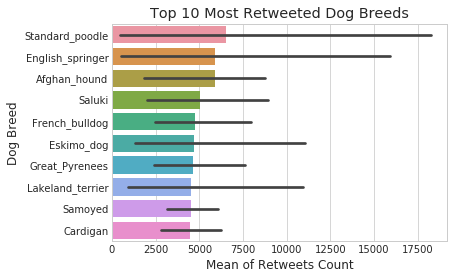

In [186]:
# plot the results on a graph

%pylab inline
sns.set_style("whitegrid")
most_retweeted_breeds = sns.barplot(x='retweet_count', y='first_prediction', data=df_breeds_retweet,
                                    order=['Standard_poodle','English_springer','Afghan_hound','Saluki','French_bulldog',
                                          'Eskimo_dog','Great_Pyrenees','Lakeland_terrier','Samoyed','Cardigan'])
most_retweeted_breeds.set_ylabel('Dog Breed')

plt.title('Top 10 Most Retweeted Dog Breeds')
plt.xlabel('Mean of Retweets Count')

Populating the interactive namespace from numpy and matplotlib


Text(0.5,0,'Mean of Favorites Count')

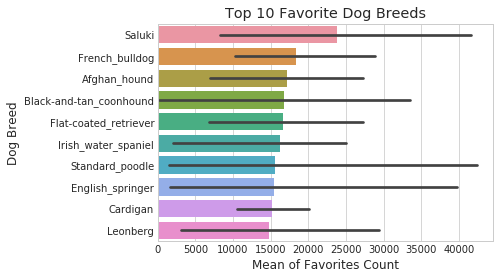

In [187]:
# plot the results on a graph

%pylab inline
sns.set_style("whitegrid")
favorite_breeds = sns.barplot(x='favorite_count', y='first_prediction', data=df_breeds_favorite,
                                    order=['Saluki','French_bulldog','Afghan_hound','Black-and-tan_coonhound','Flat-coated_retriever',
                                          'Irish_water_spaniel','Standard_poodle','English_springer','Cardigan','Leonberg'])
favorite_breeds.set_ylabel('Dog Breed')

plt.title('Top 10 Favorite Dog Breeds')
plt.xlabel('Mean of Favorites Count')

## Correlations between favorite counts, retweet counts and total_ratings

### *Correlation between favorite and retweet counts*

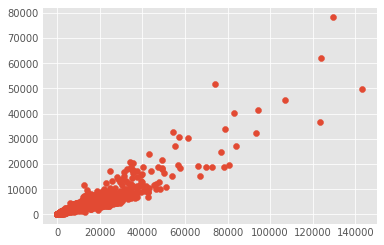

In [188]:
matplotlib.style.use('ggplot')

plt.scatter(master_data_clean.favorite_count, master_data_clean.retweet_count)
plt.show()

In [189]:
numpy.corrcoef(master_data_clean.favorite_count, master_data_clean.retweet_count)

array([[ 1.        ,  0.91707607],
       [ 0.91707607,  1.        ]])

### *Correlation between retweets count and total rating*

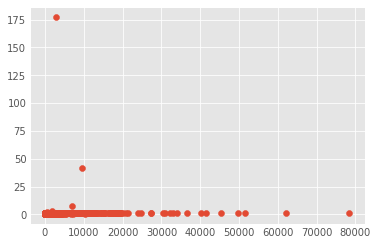

In [190]:
matplotlib.style.use('ggplot')

plt.scatter(master_data_clean.retweet_count, master_data_clean.total_rating)
plt.show()

In [191]:
numpy.corrcoef(master_data_clean.retweet_count, master_data_clean.total_rating)

array([[  1.,  nan],
       [ nan,  nan]])

### *Correlation between favorites count and total rating*

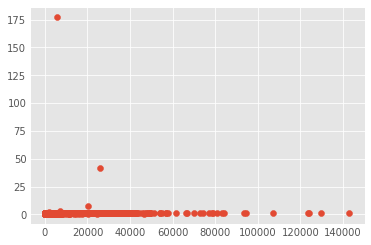

In [192]:
matplotlib.style.use('ggplot')

plt.scatter(master_data_clean.favorite_count, master_data_clean.total_rating)
plt.show()

In [193]:
numpy.corrcoef(master_data_clean.favorite_count, master_data_clean.total_rating)

array([[  1.,  nan],
       [ nan,  nan]])

## Top 10 Most Popular Dog Names

In [194]:
master_data_clean.name.value_counts().head(11)

NaN        644
Charlie    11 
Cooper     10 
Lucy       10 
Oliver     10 
Tucker     9  
Penny      9  
Sadie      8  
Winston    8  
Toby       7  
Daisy      7  
Name: name, dtype: int64